In [58]:
import os
import pickle as pkl
import pandas as pd

In [73]:
result_columns = ['imp', 'dataset', 'metric', 'value',
                  'num_samples', 'num_features', 'uncorr_frac', 'seed']
results_df = None
results_dir = 'r_test_results'

def parse_pickle(fname, n, p, uncorr_frac, seed):
    results = []
    with open(fname, 'rb') as f:
        r_map = pkl.load(f)
    for k, v in r_map.items():
        imp, ds, metric = k.split('_')
        results.append([imp, ds, metric, v[0], n, p, uncorr_frac, seed])
    return pd.DataFrame(results, columns=result_columns)
    
# read results from output directory
for fname in os.listdir(results_dir):
    if os.path.isdir(fname): continue
    if 'cv_results' not in fname: continue
    f_sp = os.path.splitext(fname)[0].split('_')
    n = int(f_sp[2].replace('n', ''))
    p = int(f_sp[3].replace('p', ''))
    uncorr_frac = float(f_sp[4].replace('u', ''))
    seed = int(f_sp[5].replace('s', ''))
    df = parse_pickle(os.path.join(results_dir, fname),
                      n, p, uncorr_frac, seed)
    if results_df is None:
        results_df = df
    else:
        results_df = pd.concat((results_df, df))
    
results_df.head(n=10)

,imp,dataset,metric,value,num_samples,num_features,uncorr_frac,seed
0,torch,train,auroc,1.000000,1000,1000,1.0,4
1,torch,train,aupr,1.000000,1000,1000,1.0,4
2,torch,train,acc,1.000000,1000,1000,1.0,4
3,torch,test,auroc,0.532242,1000,1000,1.0,4
4,torch,test,aupr,0.725860,1000,1000,1.0,4
5,torch,test,acc,0.595000,1000,1000,1.0,4
6,r,train,auroc,1.000000,1000,1000,1.0,4
7,r,train,aupr,1.000000,1000,1000,1.0,4
8,r,train,acc,1.000000,1000,1000,1.0,4
9,r,test,auroc,0.550843,1000,1000,1.0,4


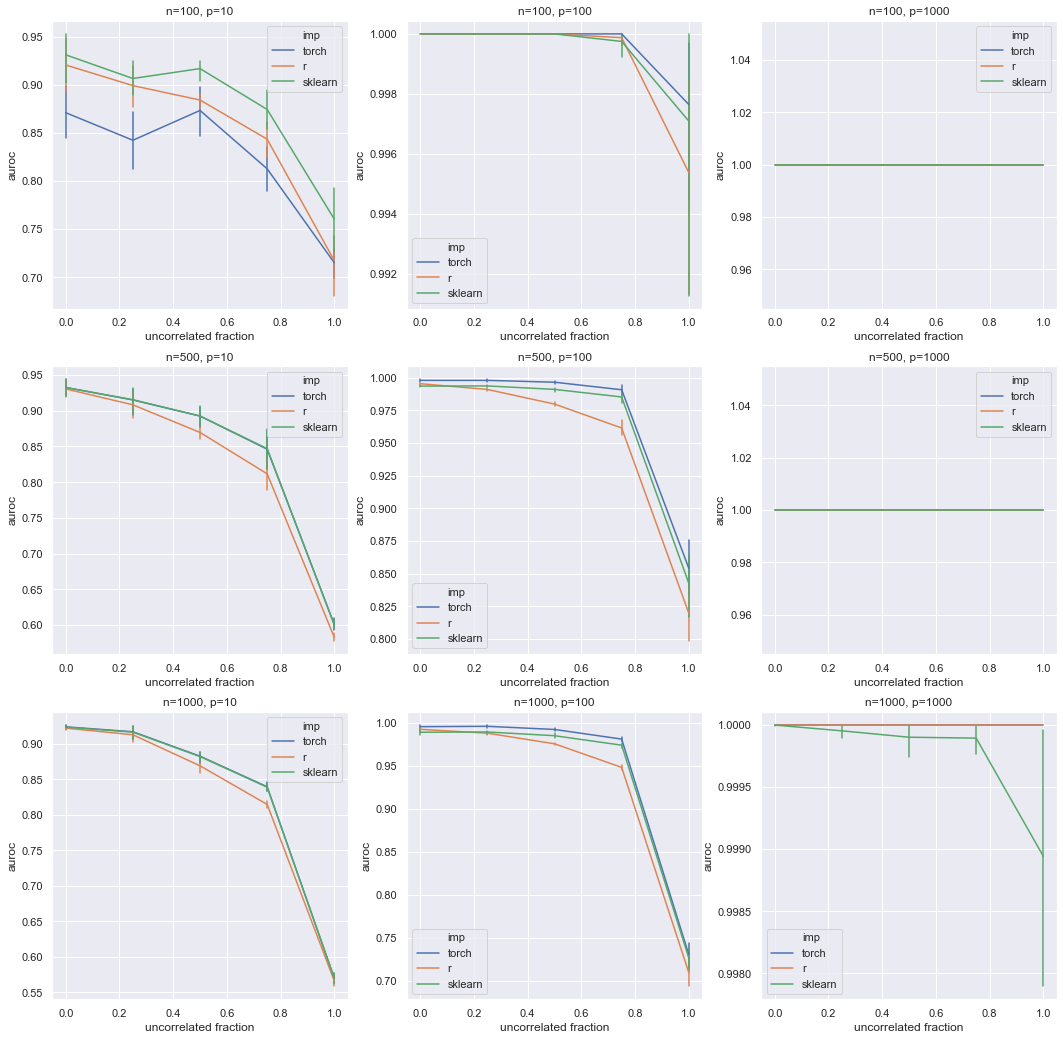

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
fig, axarr = plt.subplots(3, 3)
# fig, axarr = plt.subplots(1, 3)
fig.set_figwidth(18)
fig.set_figheight(18)

metric = 'auroc'
for i, num_samples in enumerate((100, 500, 1000)):
# for i, num_samples in enumerate([100]):
    for j, num_feats in enumerate((10, 100, 1000)):
        ax = axarr[i, j]
        # ax = axarr[j]
        filter_df = results_df[(results_df['num_samples'] == num_samples) &
                               (results_df['num_features'] == num_feats) &
                               (results_df['dataset'] == 'train') &
                               (results_df['metric'] == metric)]
        sns.lineplot(data=filter_df, x='uncorr_frac', y='value',
                     hue='imp', err_style='bars', ax=ax)
        ax.set_title('n={}, p={}'.format(num_samples, num_feats))
        ax.set_xlabel('uncorrelated fraction')
        ax.set_ylabel(metric)
    

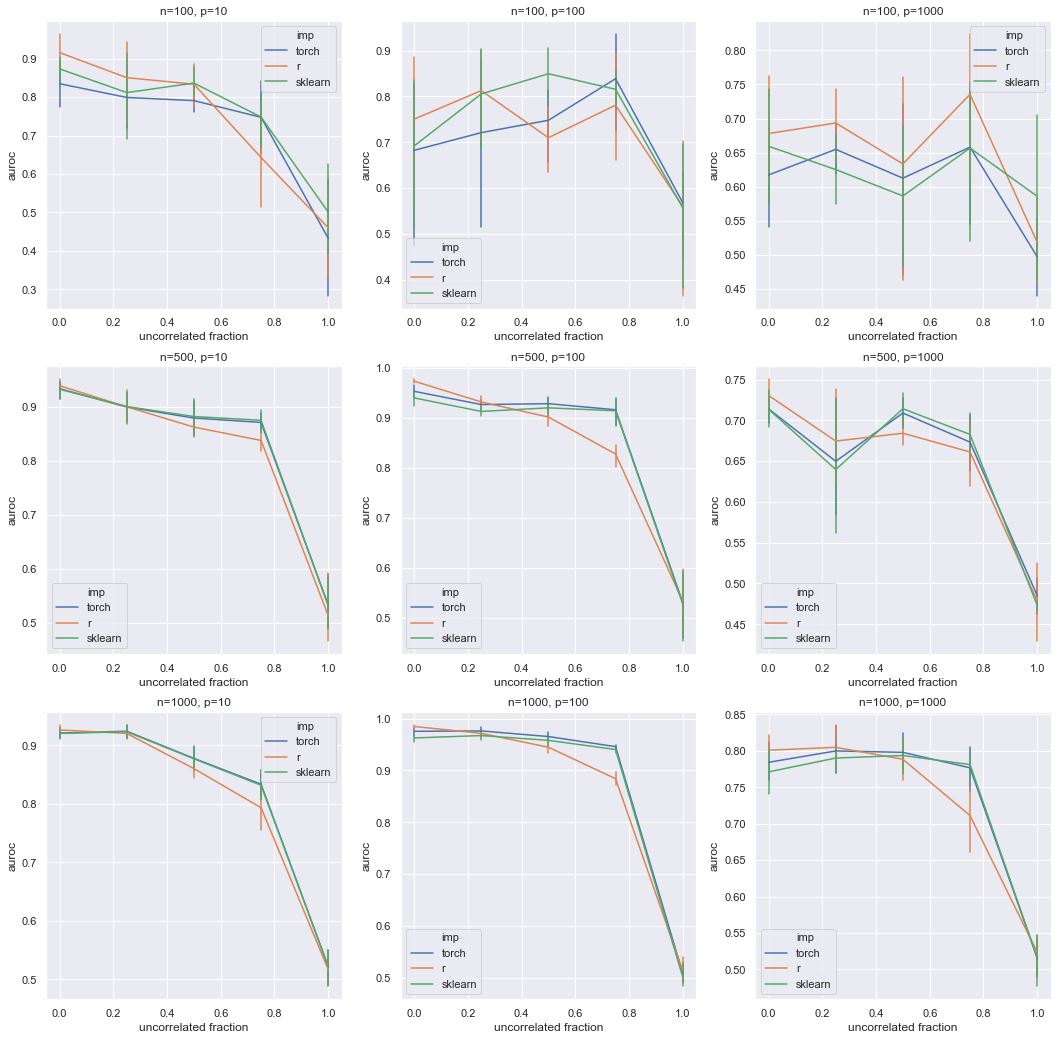

In [75]:
sns.set()
fig, axarr = plt.subplots(3, 3)
# fig, axarr = plt.subplots(1, 3)
fig.set_figwidth(18)
fig.set_figheight(18)

metric = 'auroc'
for i, num_samples in enumerate((100, 500, 1000)):
# for i, num_samples in enumerate([100]):
    for j, num_feats in enumerate((10, 100, 1000)):
        ax = axarr[i, j]
        # ax = axarr[j]
        filter_df = results_df[(results_df['num_samples'] == num_samples) &
                               (results_df['num_features'] == num_feats) &
                               (results_df['dataset'] == 'test') &
                               (results_df['metric'] == metric)]
        sns.lineplot(data=filter_df, x='uncorr_frac', y='value',
                     hue='imp', err_style='bars', ax=ax)
        ax.set_title('n={}, p={}'.format(num_samples, num_feats))
        ax.set_xlabel('uncorrelated fraction')
        ax.set_ylabel(metric)

In [16]:
len(results_df)

4050